
# MNIST classification with tensorflow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist_data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def display_digit(digit):
  plt.imshow(digit.reshape(28,28), cmap='Greys', interpolation='nearest')

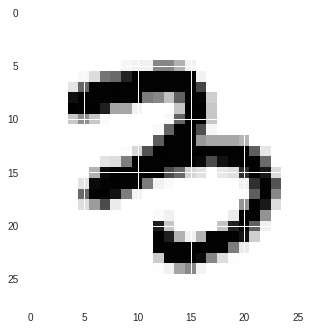

In [4]:
training_data, training_label = mnist.train.next_batch(1000)
test_data, test_label = mnist.test.next_batch(200)
display_digit(training_data[1])

In [0]:
height, width = 28, 28
channels = 1
n_inputs = height * width

## Convolution Layer 1

In [0]:
conv1_feature_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = 'SAME'

## Convolution Layer 2

In [0]:
conv2_feature_maps = 64
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = 'SAME'

In [0]:
pool3_feature_maps = conv2_feature_maps

n_fullyconn1 = 64
n_outputs = 10  #ten digits

### Starting tf graph

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_inputs], name='X')

X_reshaped = tf.reshape(X, shape=[-1, height, width, channels]) # reshae  to 2d shape=-1 means fisrt tensor is batch_size

y = tf.placeholder(tf.int32, shape=[None], name='y')

In [10]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_feature_maps,
                        kernel_size=conv1_kernel_size, strides=conv1_stride,
                        padding=conv1_pad, activation=tf.nn.relu, name='conv1')
conv1.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [11]:
conv2 = tf.layers.conv2d(conv1, filters=conv2_feature_maps,
                        kernel_size=conv2_kernel_size, strides=conv2_stride,
                        padding=conv2_pad, activation=tf.nn.relu, name='conv2')
conv2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [12]:
pool3 = tf.nn.max_pool(conv2,
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')  #[batch_size, height, width, channels]
pool3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [0]:
pool_flat = tf.reshape(pool3, shape=[-1, pool3_feature_maps * 7 * 7])

#Dense layer
fullyconn1 = tf.layers.dense(pool_flat, n_fullyconn1,
                            activation=tf.nn.relu, name='fcl')

logits = tf.layers.dense(fullyconn1, n_outputs, name='output') 

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [0]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 5
batch_size = 100

with tf.Session() as s:
  init.run()
  
  for epoch in range(n_epochs):
    for i in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      
      s.run(training_op, feed_dict={X:X_batch, y:y_batch})
      
    accuracy_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
    accuracy_test = accuracy.eval(feed_dict={X:mnist.test.images, y:mnist.test.labels})
    
    print(epoch,' Training Accuracy: ',accuracy_train,' Test Accuracy:',accuracy_test)
    
    save_path = saver.save(s,'./my_mnist_model')
    

0  Training Accuracy:  0.98  Test Accuracy: 0.9812
1  Training Accuracy:  1.0  Test Accuracy: 0.9872
2  Training Accuracy:  1.0  Test Accuracy: 0.9862
3  Training Accuracy:  0.98  Test Accuracy: 0.989
4  Training Accuracy:  1.0  Test Accuracy: 0.9888


### Completed "Hello World of CNNs"